## Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Downloading Dataset

In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-12-01 16:24:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196, fd00:0:b:33::43e4:fec4
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   126KB/s    in 0.6s    

2019-12-01 16:24:47 (126 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Reading Dataset

In [5]:
df = pd.read_csv("FuelConsumption.csv")
df.head()O

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Feature Selection

In [6]:
cdf = df[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,2.0,8.5,4,196
1,2.4,9.6,4,221
2,1.5,5.9,4,136
3,3.5,11.1,6,255
4,3.5,10.6,6,244
5,3.5,10.0,6,230
6,3.5,10.1,6,232
7,3.7,11.1,6,255
8,3.7,11.6,6,267


## Train Test Split

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Visualising Dataset

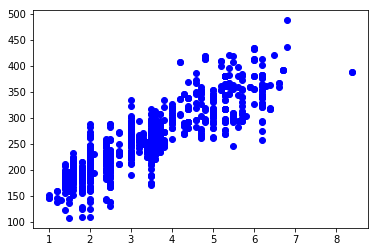

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel = "Engine Size"
plt.ylabel = "CO2 Emission"
plt.show()

## Data Transformation

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

## Fitting Model

In [20]:
regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)

print("Coefficents : ", regr.coef_)
print("Intercept : ", regr.intercept_)

Coefficents :  [[ 0.         53.43814607 -1.93405388]]
Intercept :  [103.42854571]


## Visualising Regression Line

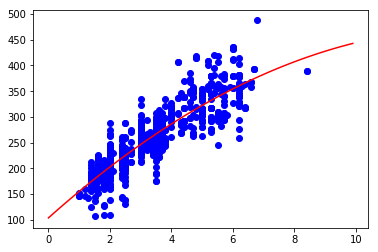

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")

xx = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0] + regr.coef_[0][1]*xx + regr.coef_[0][2]*(xx**2)

plt.xlabel = 'Engine Size'
plt.ylabel = 'CO2 Emission'

plt.plot(xx, yy, '-r')
plt.show()

## Evalution

In [34]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)

y_hat = regr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 23.60
Residual sum of squares (MSE): 952.79
R2-score: 0.66
